# Capstone Project `The Battle of Neighborhoods`

***

## Public Restrooms in Berlin
***

### Goal
The city of Boston/MA provides a neat map with the location of publically accessible restrooms. It is available at https://www.boston.gov/departments/311/public-restrooms-city-boston:

***
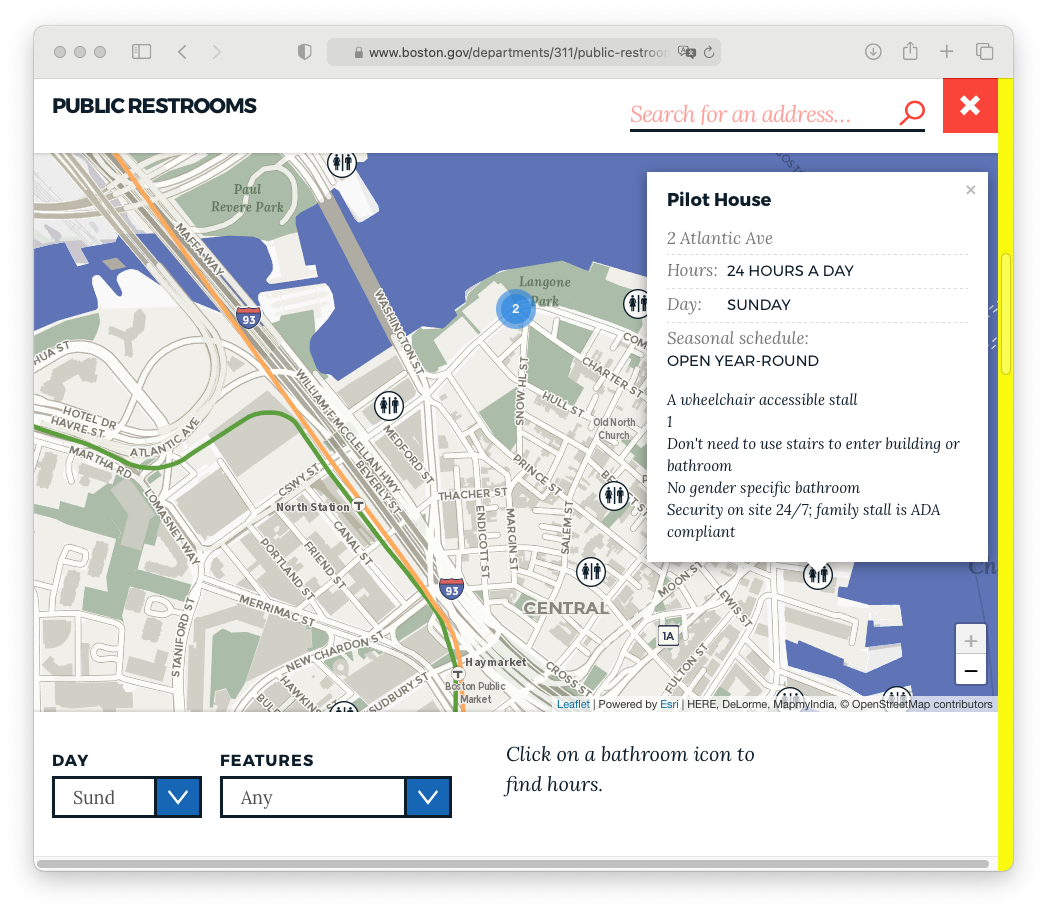
***

Such information is useful for tourists with small children and older people. There seems to be no such map available to the public for Germany's capital Berlin. But fortunately, location data of public restrooms are accessible through Berlin Open Data, an initiative of the local government of Berlin.

The goal of this project is to create a map similar to the one of Boston with data of Berlin in Python. My analysis of the two cities would include a comparison of the density of restrooms in the city centers with an emphasis on facilities for physically handicapped people. I am also curious about the information provided by Foursquare, whether it is as comprehensive and complete as the one generated from publically available information.

Following is a brief introduction to the available dataset.

**Import necessary libraries**

In [10]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


***Read data from Website***

In [11]:
file = r'https://www.berlin.de/sen/uvk/_assets/verkehr/infrastruktur/oeffentliche-toiletten/berliner-toiletten-standorte.xlsx'
tables = pd.read_excel(file)

# Let's get a limpse on the available data
table.head()

,Stand: 08.10.2020,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LavatoryID,Description,City,Street,Number (Time),PostalCode,Country,Longitude,Latitude,isOwnedByWall,isHandicappedAccessible,Price,canBePayedWithCoins,canBePayedInApp,canBePayedWithNFC,hasChangingTable,LabelID
3,Wall_101003,Toilette Ottmachauer Steig (oberhalb Badestell...,Berlin,"Krumme Lanke, Quermatenweg",(0-24 Uhr),14109,Deutschland,13.2406,52.4536,1,0,0,0,0,0,0,5
4,Wall_10357,"Wall CT, Ostseestr.",Berlin,Ostseestr.,1 (0-24 Uhr),10409,Deutschland,13.4305,52.5511,1,1,0.5,1,0,0,0,2


Turns out that the first two lines are useless and the third line contains the header. So we'll have to apply a couple of modifications to the dataset before we can feed the map with it.

1. Get rid of the first two lines
2. Make line 2 the header of the dataframe

In [ ]:
# Now, here is where the fun starts :-)